In [97]:
# 학습용 데이터 불러오기
import pandas as pd

# 데이터 불러오기
train_df = pd.read_csv("train_승인매출정보_segment.csv")

# 상위 5개 데이터 확인
print(train_df.head())

C:\Users\somee\AppData\Local\Temp\ipykernel_9376\1121756640.py:5: DtypeWarning: Columns (183) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train_승인매출정보_segment.csv")


     기준년월            ID  최종이용일자_기본  최종이용일자_신판  최종이용일자_CA  최종이용일자_카드론  \
0  201807  TRAIN_000000   20180719   20180713   20180719       10101   
1  201807  TRAIN_000001   20180719   20180719   20170728    20170327   
2  201807  TRAIN_000002   20180706   20180706   20180706    20151119   
3  201807  TRAIN_000003   20180721   20180715   20180721       10101   
4  201807  TRAIN_000004   20180124   20180124      10101       10101   

   최종이용일자_체크  최종이용일자_일시불  최종이용일자_할부  이용건수_신용_B0M  ...  승인거절건수_BL_B0M  \
0   20180203    20180709   20180713           11  ...              0   
1      10101    20180719   20171231           13  ...              0   
2   20141230    20180706   20180627           12  ...              0   
3   20141111    20180704   20180715            6  ...              0   
4   20180512    20180124      10101           -2  ...              0   

   승인거절건수_입력오류_B0M  승인거절건수_기타_B0M  승인거절건수_R3M  승인거절건수_한도초과_R3M  승인거절건수_BL_R3M  \
0                0              0           3        

In [99]:
# 학습용 컬럼 준비
selected_cols = [
    '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용금액_일시불_B0M',
    '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크', '이용금액_해외',
    '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M', '할부건수_무이자_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M',
    'RP후경과월', '카드론이용건수_누적', '카드론이용금액_누적',
    '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_오프라인_R6M',
    '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M',
    '이용건수_간편결제_R6M', '이용건수_A페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드', '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'
]

X_train = train_df[selected_cols]
y_train = train_df['Segment']

In [100]:
# 앞 두 자리 숫자를 정수형으로 변환
X_train['이용금액대'] = X_train['이용금액대'].str[:2].astype(int)

C:\Users\somee\AppData\Local\Temp\ipykernel_9376\3473520872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['이용금액대'] = X_train['이용금액대'].str[:2].astype(int)


In [101]:
from sklearn.model_selection import train_test_split

# 학습/검증 데이터 분리
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [102]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le = LabelEncoder()

# y_train 전체 인코딩
y_train_encoded = le.fit_transform(y_train)

# train/valid 나누기
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded
)

In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1. 모델 정의 및 학습
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_tr, y_tr)

# 2. 검증 데이터 예측
val_preds = model.predict(X_val)

# 3. 성능 평가
print(classification_report(y_val, val_preds, target_names=le.classes_))

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           A       0.73      0.23      0.35       194
           B       1.00      0.28      0.43        29
           C       0.70      0.49      0.57     25518
           D       0.62      0.49      0.55     69848
           E       0.91      0.96      0.94    384411

    accuracy                           0.87    480000
   macro avg       0.79      0.49      0.57    480000
weighted avg       0.86      0.87      0.86    480000



가중치 계산 적용
compute_sample_weight

In [104]:
from sklearn.utils.class_weight import compute_sample_weight

# 클래스별 샘플 가중치 계산
sample_weights = compute_sample_weight(class_weight='balanced', y=y_tr)

# 모델 학습 시 sample_weight 전달
model.fit(X_tr, y_tr, sample_weight=sample_weights)

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [105]:
model.fit(X_tr, y_tr)

# 2. 검증 데이터 예측
val_preds = model.predict(X_val)

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


이거는 제출해보기

In [93]:
# 3. 성능 평가
print(classification_report(y_val, val_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.73      0.23      0.35       194
           B       1.00      0.28      0.43        29
           C       0.70      0.49      0.57     25518
           D       0.62      0.49      0.55     69848
           E       0.91      0.96      0.94    384411

    accuracy                           0.87    480000
   macro avg       0.79      0.49      0.57    480000
weighted avg       0.86      0.87      0.86    480000



### 모델 저장

In [125]:
import joblib

# 모델 저장
joblib.dump(model, 'models/try_1_model.pkl')

# LabelEncoder도 함께 저장 (Segment 변환용)
joblib.dump(le, 'models/try_1_label_encoder.pkl')

['models/try_1_label_encoder.pkl']

### 제출용 파일 만들기

In [106]:
test_df = pd.read_csv("merged_test_data.csv")

C:\Users\somee\AppData\Local\Temp\ipykernel_9376\2358383179.py:1: DtypeWarning: Columns (183) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv("merged_test_data.csv")


In [107]:
# 학습 시 사용한 feature와 동일한 컬럼 사용
X_test = test_df[selected_cols].copy()

In [109]:
# 문자열 앞의 숫자 2자리만 추출 후 int로 변환
if '이용금액대' in X_test.columns:
    X_test['이용금액대'] = X_test['이용금액대'].astype(str).str[:2].astype(int)

In [110]:
X_test = X_test.fillna(0)

In [111]:
# 확률 기반 예측 → 가장 높은 확률의 클래스 선택
test_preds = model.predict(X_test)
test_preds_labels = le.inverse_transform(test_preds)

In [122]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Segment': test_preds_labels
})

# 중복 제거
submission = submission.drop_duplicates(subset='ID', keep='first')

# 저장
submission.to_csv("submission.csv", index=False)


In [121]:
# 예측된 Segment의 분포 확인
import pandas as pd

segment_dist = pd.Series(test_preds_labels).value_counts().sort_index()
print(segment_dist)

A        34
B         4
C     22193
D     68075
E    509694
Name: count, dtype: int64


In [134]:
member_df = pd.read_parquet("회원정보_train_통합.parquet") 
member_cols = [
    '남녀구분코드', '연령', '회원여부_이용가능_카드론',
    '소지카드수_이용가능_신용',
    '입회경과개월수_신용', '회원여부_연체',
    '탈회횟수_누적', '탈회횟수_발급1년이내',
    '거주시도명', 
    '유효카드수_신용체크', '유효카드수_신용',
    '이용카드수_신용체크', '이용카드수_신용', 
    '이용금액_R3M_신용체크', 
    '이용금액_R3M_체크', 
    '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인',
    '연회비발생카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M',
    '카드신청건수'
]

In [139]:
from sklearn.preprocessing import LabelEncoder

member_sel_df = member_df[member_cols + ['ID']].copy()

# 문자열/범주형 → 숫자 인코딩
for col in member_sel_df.select_dtypes(include='object').columns:
    member_sel_df[col] = LabelEncoder().fit_transform(member_sel_df[col].astype(str))

train_df['ID'] = train_df['ID'].astype(str)
member_sel_df['ID'] = member_sel_df['ID'].astype(str)

train_with_member = train_df.merge(member_sel_df, on='ID', how='left')

In [140]:
train_with_member

,기준년월,ID,최종이용일자_기본,최종이용일자_신판,최종이용일자_CA,최종이용일자_카드론,최종이용일자_체크,최종이용일자_일시불,최종이용일자_할부,이용건수_신용_B0M,...,이용카드수_신용체크,이용카드수_신용,이용금액_R3M_신용체크,이용금액_R3M_체크,보유여부_해외겸용_본인,이용여부_3M_해외겸용_본인,연회비발생카드수_B0M,기본연회비_B0M,제휴연회비_B0M,카드신청건수
0,201807,TRAIN_000000,20180719,20180713,20180719,10101,20180203,20180709,20180713,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201807,TRAIN_000001,20180719,20180719,20170728,20170327,10101,20180719,20171231,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201807,TRAIN_000002,20180706,20180706,20180706,20151119,20141230,20180706,20180627,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201807,TRAIN_000003,20180721,20180715,20180721,10101,20141111,20180704,20180715,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201807,TRAIN_000004,20180124,20180124,10101,10101,20180512,20180124,10101,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,20181220,20181220,10101,10101,20181212,20181220,20160501,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399996,201812,TRAIN_399996,20181202,20181202,10101,20170112,10101,20181202,20180112,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399997,201812,TRAIN_399997,20181230,20181230,10101,10101,20131124,20181230,20180919,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2399998,201812,TRAIN_399998,20161224,20161224,10101,10101,10101,20161224,20150122,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1. 타겟 설정
y = train_with_member['Segment']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. 입력 피처 정의 (selected_cols 조합)
X = train_with_member[selected_cols + member_cols].copy()

# 문자열 앞의 숫자 2자리만 추출 후 int로 변환
if '이용금액대' in X.columns:
    X['이용금액대'] = X['이용금액대'].astype(str).str[:2].astype(int)

# 3. 결측치 채우기
fill_zero_cols = ['최종카드론_대출금액', '최종카드론_대출이율', '카드론이용금액_누적', '카드론이용건수_누적',
                  '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M']
X[fill_zero_cols] = X[fill_zero_cols].fillna(0)

# 4. 로그 스케일링
log_cols = ['이용금액_일시불_B0M', '쇼핑_도소매_이용금액', '쇼핑_온라인_이용금액',
            '교통_주유이용금액', '여유_숙박이용금액', '최종카드론_대출금액',
            '카드론이용금액_누적', '이용금액_선결제_R6M']
# 로그 스케일 적용 (안전 버전)
def safe_log1p(x):
    return np.log1p(max(x, 0))

for col in log_cols:
    if col in X.columns:
        X[col] = X[col].apply(safe_log1p)

# inf, NaN 제거
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(0)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. 데이터 분할
X_tr, X_val, y_tr, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 7. 모델 학습
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=5,
    random_state=42
)
model.fit(X_tr, y_tr)

# 8. 평가
val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds, target_names=le.classes_))


              precision    recall  f1-score   support

           A       0.72      0.09      0.16       194
           B       0.80      0.14      0.24        29
           C       0.69      0.46      0.55     25518
           D       0.62      0.47      0.53     69848
           E       0.91      0.97      0.94    384411

    accuracy                           0.87    480000
   macro avg       0.75      0.43      0.48    480000
weighted avg       0.85      0.87      0.86    480000



In [148]:
import joblib

# 모델 저장
joblib.dump(model, 'models/try_3_model.pkl')

# LabelEncoder도 함께 저장 (Segment 변환용)
joblib.dump(le, 'models/try_3_label_encoder.pkl')

['models/try_3_label_encoder.pkl']

In [180]:
# 1. 회원정보 test 불러오기
member_test = pd.read_csv("merged_test_data_member.csv")

# 2. ID 문자열 통일
member_test['ID'] = member_test['ID'].astype(str)

# 3. 범주형 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

for col in member_test.select_dtypes(include='object').columns:
    member_test[col] = LabelEncoder().fit_transform(member_test[col].astype(str))

In [183]:
# 1. 원본 test 불러오기
test_df = pd.read_csv("merged_test_data.csv")
test_df['ID'] = test_df['ID'].astype(str)

C:\Users\somee\AppData\Local\Temp\ipykernel_9376\4213090686.py:2: DtypeWarning: Columns (183) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv("merged_test_data.csv")


In [185]:
test_df['ID'] = test_df['ID'].astype(str)
member_test['ID'] = member_test['ID'].astype(str)

# 병합
test_df = test_df.merge(member_test[member_cols + ['ID']], on='ID', how='left')

In [ ]:
# 학습 시 사용한 feature와 동일한 컬럼 사용
X_test = test_df[selected_cols + member_cols].copy()

# 문자열 앞의 숫자 2자리만 추출 후 int로 변환
if '이용금액대' in X_test.columns:
    X_test['이용금액대'] = X_test['이용금액대'].astype(str).str[:2].astype(int)

X_test = X_test.fillna(0)

# 확률 기반 예측 → 가장 높은 확률의 클래스 선택
test_preds = model.predict(X_test)
test_preds_labels = le.inverse_transform(test_preds)

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Segment': test_preds_labels
})

# 중복 제거
submission = submission.drop_duplicates(subset='ID', keep='first')

# 저장
submission.to_csv("submission_2.csv", index=False)

# 예측된 Segment의 분포 확인
import pandas as pd

segment_dist = pd.Series(test_preds_labels).value_counts().sort_index()
print(segment_dist)

A      5619
B     14147
C    409006
D      2401
E    168827
Name: count, dtype: int64


: 

In [176]:
import numpy as np

# 확률 예측
proba = model.predict_proba(X_test)
default_preds = np.argmax(proba, axis=1)
threshold_preds = default_preds.copy()

# A 확률이 0.25 이상이면 A로 강제 설정
threshold_preds[proba[:, 0] >= 0.25] = 0

# B 확률이 0.25 이상이면 B로 강제 설정
threshold_preds[proba[:, 1] >= 0.25] = 1

# D 확률이 0.20 이상이면 D로 강제 설정
threshold_preds[proba[:, 3] >= 0.20] = 3

# C 확률이 낮은 경우 → 가장 높은 다른 클래스로 재할당
mask = (default_preds == 2) & (proba[:, 2] < 0.4)
threshold_preds[mask] = np.argmax(proba[mask], axis=1)


In [177]:
# 인코딩 복원
threshold_preds_labels = le.inverse_transform(threshold_preds)

# 제출 파일 생성
submission_thresh = pd.DataFrame({
    'ID': test_df['ID'],  # 또는 'ID'
    'Segment': threshold_preds_labels
})
submission_thresh = submission_thresh.drop_duplicates(subset='ID')
submission_thresh.to_csv("submission_3.csv", index=False)

# 분포 확인
print(submission_thresh['Segment'].value_counts().sort_index())

Segment
A     3331
B     4865
C    62721
D     3236
E    25847
Name: count, dtype: int64


### SMOTE 적용

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# SMOTE 적용 (기존 훈련 데이터에)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tr, y_tr)

# 모델 정의 (가중치 없이 학습, 이미 균형 맞춤)
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_resampled, y_resampled)

# 예측
val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.19      0.92      0.31       194
           B       0.49      0.83      0.62        29
           C       0.46      0.66      0.54     25518
           D       0.50      0.52      0.51     69848
           E       0.93      0.90      0.92    384411

    accuracy                           0.83    480000
   macro avg       0.51      0.77      0.58    480000
weighted avg       0.84      0.83      0.84    480000



In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Pretendard' 
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

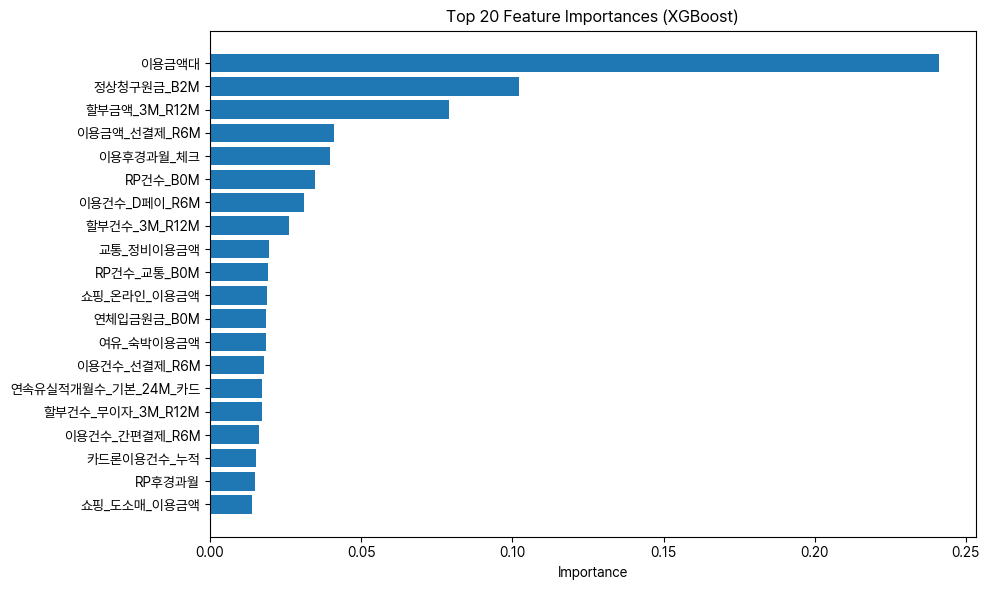

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. 피처 중요도 추출
importances = model.feature_importances_

# 2. 피처 이름과 함께 정리
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 3. 시각화 (상위 20개)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:20][::-1], feature_importance_df['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

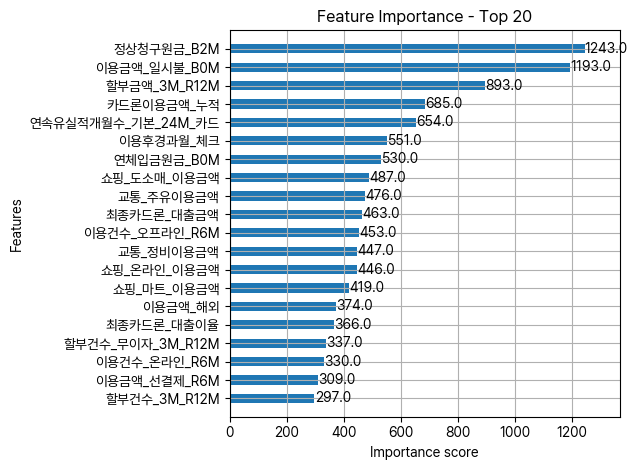

In [ ]:
from xgboost import plot_importance

plot_importance(model, max_num_features=20, height=0.5, importance_type='weight')  # or 'gain', 'cover'
plt.title('Feature Importance - Top 20')
plt.tight_layout()
plt.show()

이용금액대, 정상청구원금, 할부금액에 대하여 피처 재선정

In [29]:
# 숫자형으로 변환 (예: '01.100만원+' → 1)
train_df['이용금액대'] = train_df['이용금액대'].str[:2].astype(int)

AttributeError: Can only use .str accessor with string values!

In [34]:
# 원본 train_df에서 키워드 기반 컬럼 추출
keywords = ['이용금액대', '정상청구원금', '할부금액']
selected_features = [col for col in train_df.columns if any(key in col for key in keywords) and col != 'Segment']

print("선택된 피처 수:", len(selected_features))
print("선택된 컬럼:\n", selected_features)

선택된 피처 수: 20
선택된 컬럼:
 ['할부금액_3M_R12M', '할부금액_6M_R12M', '할부금액_12M_R12M', '할부금액_14M_R12M', '할부금액_유이자_3M_R12M', '할부금액_유이자_6M_R12M', '할부금액_유이자_12M_R12M', '할부금액_유이자_14M_R12M', '할부금액_무이자_3M_R12M', '할부금액_무이자_6M_R12M', '할부금액_무이자_12M_R12M', '할부금액_무이자_14M_R12M', '할부금액_부분_3M_R12M', '할부금액_부분_6M_R12M', '할부금액_부분_12M_R12M', '할부금액_부분_14M_R12M', '정상청구원금_B0M', '정상청구원금_B2M', '정상청구원금_B5M', '이용금액대']


In [35]:
# 4. X, y 구성
X_train = train_df[selected_features]
y_train = train_df['Segment']

In [39]:
# 샘플 수 확인
import numpy as np
unique, counts = np.unique(y_tr, return_counts=True)
dict(zip(unique, counts))

{0: 778, 1: 115, 2: 102072, 3: 279394, 4: 1537641}

In [40]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# Train/Valid 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# SMOTE 설정 - 가볍게 설정
from imblearn.over_sampling import SMOTE

sampling_strategy = {
    0: 3000,
    1: 3000,
    2: 120000
    # 3, 4는 그대로 두기
}

smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=3, random_state=42)
X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr)

SMOTE 안했을때도 -> 좋아지는지 ?

In [41]:
# 모델 학습 (xgboost)
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_tr_resampled, y_tr_resampled)

# 예측 및 평가
from sklearn.metrics import classification_report
val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.38      0.11      0.17       194
           B       0.09      0.45      0.14        29
           C       0.63      0.50      0.55     25518
           D       0.58      0.37      0.45     69848
           E       0.89      0.96      0.93    384411

    accuracy                           0.85    480000
   macro avg       0.51      0.48      0.45    480000
weighted avg       0.83      0.85      0.84    480000



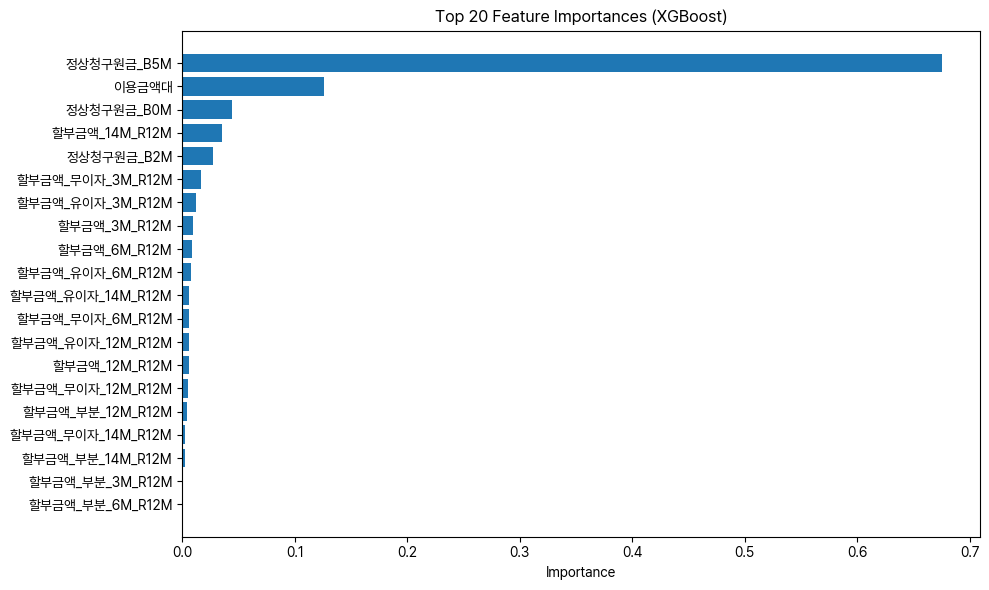

In [42]:
# 1. 피처 중요도 추출
importances = model.feature_importances_

# 2. 피처 이름과 함께 정리
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 3. 시각화 (상위 20개)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:20][::-1], feature_importance_df['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

이용건수_ / 이용금액_ / 이용후경과월_ 

In [43]:
# 1. 원하는 키워드 설정
keywords = ['이용건수_', '이용금액_', '이용후경과월_']

# 2. 해당 키워드 포함된 컬럼만 추출
selected_features = [col for col in train_df.columns if any(k in col for k in keywords)]

print("선택된 피처 수:", len(selected_features))
print("컬럼 목록:\n", selected_features)


선택된 피처 수: 168
컬럼 목록:
 ['이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용금액_일시불_B0M', '이용금액_할부_B0M', '이용금액_할부_유이자_B0M', '이용금액_할부_무이자_B0M', '이용금액_부분무이자_B0M', '이용금액_CA_B0M', '이용금액_체크_B0M', '이용금액_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M', '이용건수_CA_R12M', '이용건수_체크_R12M', '이용건수_카드론_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_할부_유이자_R12M', '이용금액_할부_무이자_R12M', '이용금액_부분무이자_R12M', '이용금액_CA_R12M', '이용금액_체크_R12M', '이용금액_카드론_R12M', '최대이용금액_일시불_R12M', '최대이용금액_할부_R12M', '최대이용금액_할부_유이자_R12M', '최대이용금액_할부_무이자_R12M', '최대이용금액_부분무이자_R12M', '최대이용금액_CA_R12M', '최대이용금액_체크_R12M', '최대이용금액_카드론_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_할부_R6M', '이용건수_

In [44]:
X_train = train_df[selected_features]
y_train = train_df['Segment']

In [45]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# Train/Valid 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# SMOTE 설정 - 가볍게 설정
from imblearn.over_sampling import SMOTE

sampling_strategy = {
    0: 3000,
    1: 3000,
    2: 120000
    # 3, 4는 그대로 두기
}

smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=3, random_state=42)
X_tr_resampled, y_tr_resampled = smote.fit_resample(X_tr, y_tr)

In [46]:
# 모델 학습 (xgboost)
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_tr_resampled, y_tr_resampled)

# 예측 및 평가
from sklearn.metrics import classification_report
val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.61      0.43      0.51       194
           B       0.76      0.55      0.64        29
           C       0.69      0.57      0.62     25518
           D       0.67      0.61      0.64     69848
           E       0.94      0.96      0.95    384411

    accuracy                           0.89    480000
   macro avg       0.73      0.63      0.67    480000
weighted avg       0.89      0.89      0.89    480000



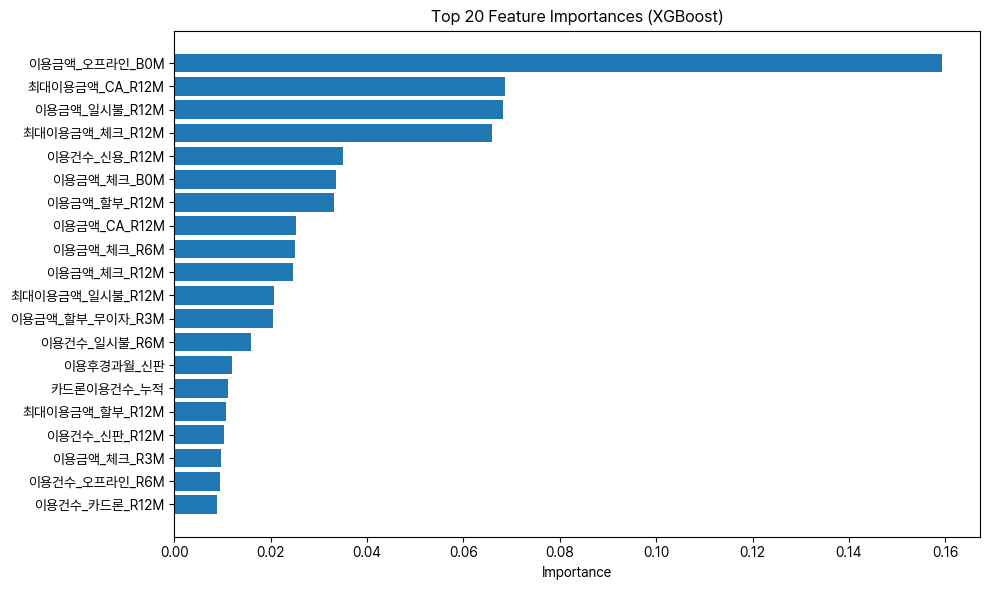

In [49]:
# 1. 피처 중요도 추출
importances = model.feature_importances_

# 2. 피처 이름과 함께 정리
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 3. 시각화 (상위 20개)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'][:20][::-1], feature_importance_df['importance'][:20][::-1])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

In [53]:
selected_cols = [
    '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용금액_일시불_B0M',
    '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크', '이용금액_해외',
    '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M', '할부건수_무이자_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M',
    'RP후경과월', '카드론이용건수_누적', '카드론이용금액_누적',
    '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_오프라인_R6M',
    '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M',
    '이용건수_간편결제_R6M', '이용건수_A페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드', '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'
]

In [56]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
# A vs others
y = (train_df['Segment'] == 'A').astype(int)

X = train_df[selected_cols].copy()

X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.001541
         Iterations: 35


c:\Users\somee\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                Segment   No. Observations:              2400000
Model:                          Logit   Df Residuals:                  2399957
Method:                           MLE   Df Model:                           42
Date:                Thu, 03 Jul 2025   Pseudo R-squ.:                  0.5682
Time:                        13:21:52   Log-Likelihood:                -3698.1
converged:                      False   LL-Null:                       -8564.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.5333   4.48e+04      0.000      1.000   -8.78e+04    8.78e+04
이용건수_신용_B0M            1.4373      0.071     20.207      0.000       1.298       1.577
이용건수_신판_B0M         

In [57]:
train_df[selected_cols]

,이용건수_신용_B0M,이용건수_신판_B0M,이용건수_일시불_B0M,이용금액_일시불_B0M,이용후경과월_신용,이용후경과월_일시불,이용후경과월_체크,이용금액_해외,쇼핑_도소매_이용금액,쇼핑_마트_이용금액,...,이용건수_D페이_R6M,이용금액_선결제_R6M,이용건수_선결제_R6M,연체입금원금_B0M,정상청구원금_B2M,선입금원금_B2M,연속유실적개월수_기본_24M_카드,승인거절건수_R3M,승인거절건수_한도초과_R3M,이용금액대
0,11,9,8,1995,0,0,5,0,0,0,...,0,0,0,8104,16524,0,13,3,3,1
1,13,13,13,2862,0,0,12,0,645,0,...,0,0,0,826,2420,0,12,3,3,3
2,12,10,10,5854,0,0,12,0,1038,924,...,0,0,0,9364,21826,0,8,0,0,1
3,6,4,3,387,0,0,12,0,0,801,...,0,0,0,10923,19172,0,5,3,3,1
4,-2,-2,-2,0,6,6,2,0,0,0,...,0,0,0,0,272,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,2,2,2,0,8,0,0,0,0,0,...,0,0,0,19,0,0,0,0,0,9
2399996,10,10,10,7663,0,0,12,0,1496,0,...,0,0,0,3756,14844,0,17,0,0,1
2399997,10,10,10,4545,1,0,12,0,0,0,...,0,0,0,1703,6862,0,24,0,0,2
2399998,-2,-2,-2,0,12,12,12,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [58]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
# D vs others
y = (train_df['Segment'] == 'D').astype(int)

X = train_df[selected_cols].copy()

X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.322953
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Segment   No. Observations:              2400000
Model:                          Logit   Df Residuals:                  2399957
Method:                           MLE   Df Model:                           42
Date:                Thu, 03 Jul 2025   Pseudo R-squ.:                  0.2215
Time:                        13:28:14   Log-Likelihood:            -7.7509e+05
converged:                       True   LL-Null:                   -9.9565e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7231      0.013   -132.136      0.000      -1.749      -1.697
이용건수_

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 유의한 feature만 가져오기
selected_cols = [  # p-value < 0.05 로 추려낸 컬럼
    '이용건수_신용_B0M', '이용건수_신판_B0M', '이용금액_일시불_B0M',
    '이용후경과월_일시불', '이용후경과월_체크', '이용금액_해외',
    '쇼핑_온라인_이용금액', '교통_주유이용금액', '교통_정비이용금액',
    '여유_숙박이용금액', '할부건수_3M_R12M', '할부금액_3M_R12M',
    '할부건수_무이자_3M_R12M', 'RP건수_B0M', 'RP건수_통신_B0M',
    'RP건수_교통_B0M', '카드론이용건수_누적', '이용건수_온라인_R6M',
    '이용건수_오프라인_R6M', '이용건수_선결제_R6M', '정상청구원금_B2M',
    '연속유실적개월수_기본_24M_카드'
]

X_vif = train_df[selected_cols].copy()

# 이용금액대 정제 포함 (필요 시)
if '이용금액대' in X_vif.columns:
    X_vif['이용금액대'] = X_vif['이용금액대'].astype(str).str[:2].astype(int)

# 상수항 추가
X_vif_const = add_constant(X_vif)

# VIF 계산
vif_df = pd.DataFrame()
vif_df['feature'] = X_vif_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_df.sort_values(by='VIF', ascending=False))


               feature          VIF
2          이용건수_신판_B0M  4206.869866
1          이용건수_신용_B0M  4158.549825
11        할부건수_3M_R12M    14.373316
13    할부건수_무이자_3M_R12M    12.300041
3         이용금액_일시불_B0M    10.837890
0                const    10.427226
14            RP건수_B0M     8.951089
19       이용건수_오프라인_R6M     7.441297
21          정상청구원금_B2M     6.235631
16         RP건수_교통_B0M     6.145463
18        이용건수_온라인_R6M     4.964692
12        할부금액_3M_R12M     4.425018
7          쇼핑_온라인_이용금액     4.242632
15         RP건수_통신_B0M     3.869130
8            교통_주유이용금액     2.215274
22  연속유실적개월수_기본_24M_카드     1.726440
9            교통_정비이용금액     1.644840
4           이용후경과월_일시불     1.354241
6              이용금액_해외     1.313234
17          카드론이용건수_누적     1.207224
10           여유_숙박이용금액     1.110017
20        이용건수_선결제_R6M     1.104487
5            이용후경과월_체크     1.038417


In [60]:
selected_final_features = [
    '쇼핑_온라인_이용금액',
    '교통_주유이용금액',
    '교통_정비이용금액',
    '여유_숙박이용금액',
    '할부금액_3M_R12M',
    'RP건수_통신_B0M',
    'RP건수_교통_B0M',
    '카드론이용건수_누적',
    '이용건수_온라인_R6M',
    '이용건수_오프라인_R6M',
    '이용건수_선결제_R6M',
    '정상청구원금_B2M',
    '연속유실적개월수_기본_24M_카드'
]

              precision    recall  f1-score   support

           A       0.71      0.06      0.11       194
           B       0.33      0.03      0.06        29
           C       0.66      0.43      0.52     25518
           D       0.59      0.40      0.48     69848
           E       0.89      0.97      0.93    384411

    accuracy                           0.86    480000
   macro avg       0.64      0.38      0.42    480000
weighted avg       0.84      0.86      0.84    480000



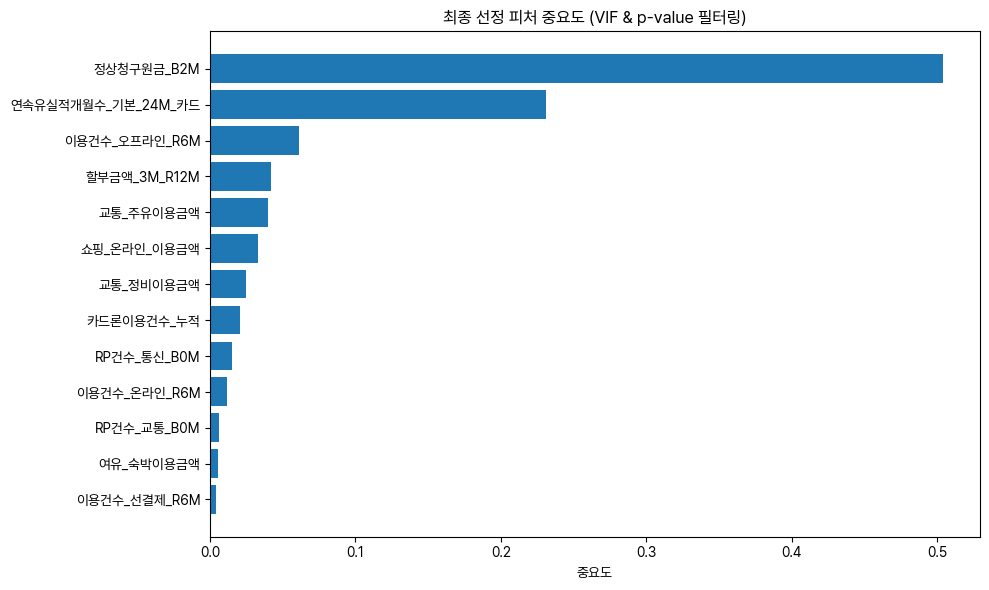

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# 1. 피처/타겟 구성
X = train_df[selected_final_features].copy()
y = train_df['Segment']

# 2. 타겟 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. 데이터 분할
X_tr, X_val, y_tr, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 4. 모델 정의 및 학습
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=5,
    random_state=42
)
model.fit(X_tr, y_tr)

# 5. 평가
val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds, target_names=le.classes_))

# 6. 중요도 시각화
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:20][::-1], importance_df['importance'][:20][::-1])
plt.xlabel('중요도')
plt.title('최종 선정 피처 중요도 (VIF & p-value 필터링)')
plt.tight_layout()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [62]:
# 소프트맥스 확률 예측
proba = model.predict_proba(X_val)

In [66]:
import numpy as np
from sklearn.metrics import classification_report

# 기본 argmax 예측
default_preds = np.argmax(proba, axis=1)

# 🎯 threshold 기반 예측 보정
threshold_preds = default_preds.copy()

# 👇 클래스 인덱스 확인 (예: A=0, B=1 등)
print(le.classes_)  # ex: ['A', 'B', 'C', 'D', 'E']

# A (0번 클래스) 확률이 0.35 이상이면 무조건 A로 간주 #2차 : 0.20
threshold_preds[proba[:, 0] >= 0.20] = 0

# B (1번 클래스) 확률이 0.30 이상이면 무조건 B로 간주 #2차 : 0.15
threshold_preds[proba[:, 1] >= 0.15] = 1

['A' 'B' 'C' 'D' 'E']


In [67]:
print("🔹 기본 예측 기준")
print(classification_report(y_val, default_preds, target_names=le.classes_))

print("🔸 threshold 조정 후")
print(classification_report(y_val, threshold_preds, target_names=le.classes_))

🔹 기본 예측 기준
              precision    recall  f1-score   support

           A       0.71      0.06      0.11       194
           B       0.33      0.03      0.06        29
           C       0.66      0.43      0.52     25518
           D       0.59      0.40      0.48     69848
           E       0.89      0.97      0.93    384411

    accuracy                           0.86    480000
   macro avg       0.64      0.38      0.42    480000
weighted avg       0.84      0.86      0.84    480000

🔸 threshold 조정 후
              precision    recall  f1-score   support

           A       0.41      0.19      0.26       194
           B       0.39      0.31      0.35        29
           C       0.66      0.43      0.52     25518
           D       0.59      0.40      0.48     69848
           E       0.89      0.97      0.93    384411

    accuracy                           0.86    480000
   macro avg       0.59      0.46      0.51    480000
weighted avg       0.84      0.86      0.84    48

In [ ]:
member_df = pd.read_parquet("회원정보_train_통합.parquet") 

In [69]:
member_df.info()
member_df.describe()
member_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 78 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                int64  
 1   ID                  object 
 2   남녀구분코드              int64  
 3   연령                  object 
 4   Segment             object 
 5   회원여부_이용가능           int64  
 6   회원여부_이용가능_CA        int64  
 7   회원여부_이용가능_카드론       int64  
 8   소지여부_신용             int64  
 9   소지카드수_유효_신용         int64  
 10  소지카드수_이용가능_신용       int64  
 11  입회일자_신용             int64  
 12  입회경과개월수_신용          int64  
 13  회원여부_연체             int64  
 14  이용거절여부_카드론          int64  
 15  동의여부_한도증액안내         int64  
 16  수신거부여부_TM           int64  
 17  수신거부여부_DM           int64  
 18  수신거부여부_메일           int64  
 19  수신거부여부_SMS          int64  
 20  가입통신회사코드            object 
 21  탈회횟수_누적             int64  
 22  최종탈회후경과월            int64  
 23  탈회횟수_발급6개월이내        int64  
 24  탈회횟수_발급1년이내         int6

기준년월             0
ID               0
남녀구분코드           0
연령               0
Segment          0
                ..
우수회원면제카드수_B0M    0
기타면제카드수_B0M      0
카드신청건수           0
Life_Stage       0
최종카드발급경과월        0
Length: 78, dtype: int64

In [74]:
# 선택한 컬럼 목록
selected_member_cols = [
    'ID',
    '남녀구분코드', '연령', '회원여부_이용가능_카드론',
    '소지카드수_이용가능_신용',
    '입회경과개월수_신용', '회원여부_연체',
    '탈회횟수_누적', '탈회횟수_발급1년이내',
    '거주시도명', 
    '유효카드수_신용체크', '유효카드수_신용',
    '이용카드수_신용체크', '이용카드수_신용', 
    '이용금액_R3M_신용체크', 
    '이용금액_R3M_체크', 
    '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인',
    '연회비발생카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M',
    '카드신청건수'
]

In [75]:
member_sel_df = member_df[selected_member_cols].copy()

# 범주형 컬럼 자동 감지
cat_cols = member_sel_df.select_dtypes(include='object').columns.tolist()

# Label Encoding (또는 get_dummies 가능)
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    member_sel_df[col] = LabelEncoder().fit_transform(member_sel_df[col].astype(str))

In [ ]:
# 병합 전에 ID 타입 일치시킴
train_df['ID'] = train_df['ID'].astype(str)
member_sel_df['ID'] = member_sel_df['ID'].astype(str)

# 이제 병합
train_with_member = train_df.merge(member_sel_df, on='ID', how='left')

In [80]:
print(train_with_member.shape)
print(train_with_member.columns)

(2400000, 428)
Index(['기준년월', 'ID', '최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA', '최종이용일자_카드론',
       '최종이용일자_체크', '최종이용일자_일시불', '최종이용일자_할부', '이용건수_신용_B0M',
       ...
       '이용카드수_신용체크', '이용카드수_신용', '이용금액_R3M_신용체크', '이용금액_R3M_체크',
       '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '연회비발생카드수_B0M', '기본연회비_B0M',
       '제휴연회비_B0M', '카드신청건수'],
      dtype='object', length=428)


In [81]:
member_cols = [
    '남녀구분코드', '연령', '회원여부_이용가능_카드론',
    '소지카드수_이용가능_신용',
    '입회경과개월수_신용', '회원여부_연체',
    '탈회횟수_누적', '탈회횟수_발급1년이내',
    '거주시도명', 
    '유효카드수_신용체크', '유효카드수_신용',
    '이용카드수_신용체크', '이용카드수_신용', 
    '이용금액_R3M_신용체크', 
    '이용금액_R3M_체크', 
    '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인',
    '연회비발생카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M',
    '카드신청건수'
]

In [ ]:
# 회원정보 컬럼과 결합 컬럼들
final_features = selected_cols + member_cols

In [83]:
# 1. X, y 정의
X = train_with_member[final_features].copy()
y = train_with_member['Segment']

# 2. 타겟 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3. 학습/검증 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 4. 모델 학습
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=5,
    random_state=42
)
model.fit(X_tr, y_tr)

# 5. 평가
from sklearn.metrics import classification_report

val_preds = model.predict(X_val)
print(classification_report(y_val, val_preds, target_names=le.classes_))

              precision    recall  f1-score   support

           A       0.80      0.08      0.15       194
           B       0.71      0.17      0.28        29
           C       0.68      0.45      0.54     25518
           D       0.61      0.46      0.52     69848
           E       0.90      0.97      0.93    384411

    accuracy                           0.86    480000
   macro avg       0.74      0.43      0.48    480000
weighted avg       0.85      0.86      0.85    480000

